# An introduction to Interact

"The interact function (ipywidgets.interact) automatically creates user interface (UI) controls for exploring code and data interactively. It is the easiest way to get started using IPython’s widgets." [Using Interact Documentation](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html)

In [1]:
import matplotlib.pyplot as plt

## Why would we want to use Interact in the first place? 

An _interactive_ figure speaks a thousand words.

In [ ]:
%load ../master/demos/plotter.py

## Basic interact

Let's jump in: for a basic function `vp_from_dt` that prints out `Vp` for a given `DT`, we can construct a simple slider like so:

In [3]:
def vp_from_dt(dt):
    
    vp = 10e6 / dt
    
    return print(f'vp = {vp:.2f}')

In [4]:
from ipywidgets import interact

interact(vp_from_dt, dt=3500)

interactive(children=(IntSlider(value=3500, description='dt', max=10500, min=-3500), Output()), _dom_classes=(…

<function __main__.vp_from_dt(dt)>

For a similar function that requires a `boolean`, we can make a toggle, also notice that by saving the `interact()` function to a `name`, we suppress the output `<function __main__.convert_vp_to_dt(vp, convert_to_dt)>`.

We have also created a dropdown list automatically by passing an `iterable` to the `interact()` function.

In [5]:
import numpy as np

vp = np.arange(2400, 2750, 50)
def convert_vp_to_dt(vp, convert_to_dt):
    if convert_to_dt:
        output = 1e6/vp
    else:
        output = vp
    return print(f'The result is {output:.2f}')

In [6]:
my_boolean = interact(convert_vp_to_dt, vp=vp, convert_to_dt=True)

interactive(children=(Dropdown(description='vp', options=(2400, 2450, 2500, 2550, 2600, 2650, 2700), value=240…

If we need to get input from the user, we can use an `input box`, (see [here](https://stackoverflow.com/questions/35361038/using-ipython-ipywidget-to-create-a-variable) for example):

- We first define variables for the `input` and `saved` variables
- Then we define a `get_input()` function that will assign the input value to the saved variable
- Next we call the `on_submit()` function on the `input variable`, passing it the `get_input()` function

In [7]:
import ipywidgets as widgets

input_string = widgets.Text(placeholder='Please type something in this box')
saved_string = widgets.Text()

def get_input(input_text):
    """bind the input text to a variable"""
    saved_string.value = input_string.value
    return saved_string

In [8]:
input_string.on_submit(get_input)

We can now use the `input_variable` to see an input box:

In [9]:
input_string

Text(value='', placeholder='Please type something in this box')

And the `output_variable` will be updated `on_submit()`:

In [10]:
saved_string

Text(value='')

We now have access to the `output_variable` and can saved it to a string for manipulation:

In [11]:
my_string = saved_string.value
my_string.upper()

''

Also note that the `saved_variable` remains bound to the `input_variable`, so if you type something else in the `input_variable` box, the `saved_variable` is updated. The reverse is _not_ true however.

### There are many widget types available:
- [Numeric widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Numeric-widgets)
- [Boolean widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Boolean-widgets)
- [Selection widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Selection-widgets)
- [String widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#String-widgets)
- [Image](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Image)
- [Button](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Button)
- [Output](https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html)
- [Play (Animation) widget](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Play-(Animation)-widget)
- [Date picker](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Date-picker)
- [Color picker](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Color-picker)
- [Controller](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Controller)
- [Container/Layout widgets](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Container/Layout-widgets)

Almost all have different `keyword arguments` that can be set as in the `IntSlider` example below:

In [12]:
widgets.IntSlider(
    value=12,
    min=0,
    max=100,
    step=1,
    description='Slider:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

IntSlider(value=12, continuous_update=False, description='Slider:')

### Exercise
Try to replicate the range slider below using a min of 0 and a max of 20.
Once you've got it working, see what changes you can make to it.

<img src='../data/range-slider.png'/>

If you don't know where to start, you'll find all the widgets [here](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#Widget-List).

In [13]:
# Your code here.



In [14]:
widgets.IntRangeSlider(
    value=[3, 12],
    min=0,
    max=20,
    step=1,
    description='Range:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
)

IntRangeSlider(value=(3, 12), continuous_update=False, description='Range:', max=20)

## Interact usage

`interact` can also be used as a `decorator`. Interact [decorators](https://wiki.python.org/moin/PythonDecorators#What_is_a_Decorator) allow you expand the functionality of your function and interact with it in a single shot. As this `square_or_double()` example function shows, interact also works with functions that have multiple arguments. [source](https://ipywidgets.readthedocs.io/en/stable/examples/Using%20Interact.html#Basic-interact)

In [15]:
method = widgets.RadioButtons(options=['squared','doubled'],description='option')
y = widgets.IntSlider(value=5,min=0,max=10,step=1,description='y')

@interact(method=method, y=y)
def square_or_double(method, y):
    if method == 'squared':
        result = y**2
    else:
        result = y*2
    return print(f'{y} {method} = {result}')

interactive(children=(RadioButtons(description='option', options=('squared', 'doubled'), value='squared'), Int…

### Exercise
Write a function that returns `a` to the power of `b` but use the interact decorator to make both `a` and `b` interactive (between 0 and 10 in steps of 1), add a toggle to negate the result.

In [16]:
# Your code here.



In [17]:
@interact(a=widgets.IntSlider(value=2,min=0,max=10,step=1,description='a'),
          b=widgets.IntSlider(value=4,min=0,max=10,step=1,description='b'),
          negate=widgets.Checkbox(value=False,description='negate'))
def pow_a_b(a, b, negate):
    """return a to the power of b or negative a**b"""
    if negate:
        out = -a**b
    else:
        out = a**b
    return out

interactive(children=(IntSlider(value=2, description='a', max=10), IntSlider(value=4, description='b', max=10)…

In [18]:
@interact(a=(0,10,1), b=(0,10,1), negate=False)
def pow_a_b(a, b, negate):
    """return a to the power of b or negative a**b"""
    if negate:
        out = -a**b
    else:
        out = a**b
    return out

interactive(children=(IntSlider(value=5, description='a', max=10), IntSlider(value=5, description='b', max=10)…

### Worked Example

Let's build an example of an interactive wavelet using [Bruges](https://github.com/agile-geoscience/bruges), we'll use:
- [Ricker](https://github.com/agile-geoscience/bruges/blob/master/bruges/filters/wavelets.py)
- [Gabor](https://github.com/agile-geoscience/bruges/blob/master/bruges/filters/wavelets.py)
- [sinc](https://github.com/agile-geoscience/bruges/blob/master/bruges/filters/wavelets.py)
- [cosine](https://github.com/agile-geoscience/bruges/blob/master/bruges/filters/wavelets.py)

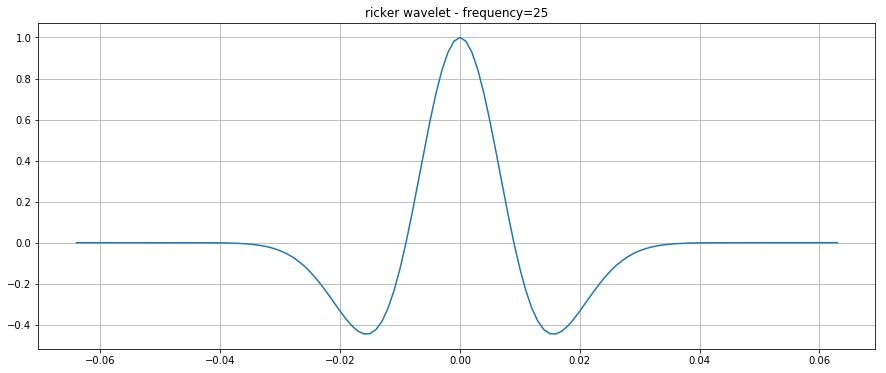

In [19]:
from bruges.filters.wavelets import ricker, gabor, sinc, cosine

w, t = ricker(duration=0.128, dt=0.001, f=25, return_t=True)

fig, ax = plt.subplots(figsize=(15, 6), ncols=1)

ax.plot(t, w)
ax.grid()
ax.set_title(f'ricker wavelet - frequency=25')

plt.show()

### Exercise
Let's turn this into an interactive function:
- first define a function
- copy the code above into that function
- use an interact decorator and widget to have frequency by a slider (allow a range from 1Hz to 75Hz in steps of 1Hz)

Remember to correct the title.

In [20]:
# Your code here.



In [21]:
@interact(frequency=widgets.IntSlider(value=25,min=1,max=75,step=1))
def plot_filter(frequency):
    w, t = ricker(duration=0.128, dt=0.001, f=frequency, return_t=True)

    fig, ax = plt.subplots(figsize=(15, 6), ncols=1)

    ax.plot(t, w)
    ax.grid()
    ax.set_title(f'ricker wavelet - frequency={frequency}')

    plt.show()
    
    return

interactive(children=(IntSlider(value=25, description='frequency', max=75, min=1), Output()), _dom_classes=('w…

### Exercise
Now let's allow the user to pass both duration _and_ dt as interactive arguments, using your code above:
- add two more arguments to the function
- define these arguments `duration` and `dt` as `Interact.widgets`

For `duration` use a value 0.256 seconds with a minimum of 0.04 seconds, a maximum of 0.512 seconds and steps of 0.004 seconds.

For `dt` use a value 0.001 seconds with a minimum of 0.0001 seconds, a maximum of 0.008 seconds and steps of 0.0001 seconds. You may want to use the `**kwargs` `readout_format='.4f'` for `dt`.

N.B.: you can optionally add `continuous_update=False` to the arguments of your `widgets` in order to avoid 'choppy' display when you move the sliders.

In [22]:
# Your code here.



In [23]:
@interact(frequency=widgets.IntSlider(value=25,min=1,max=75,step=1,continuous_update=False),
         duration=widgets.FloatSlider(value=0.256,min=0.04,max=0.512,step=0.004,continuous_update=False),
         dt=widgets.FloatSlider(value=0.001,min=0.0001,max=0.008,
                                step=0.0001,continuous_update=False,
                                readout_format='.4f'))
def plot_filter(frequency,duration,dt):
    w, t = ricker(duration=duration, dt=dt, f=frequency, return_t=True)

    fig, ax = plt.subplots(figsize=(15, 6), ncols=1)

    ax.plot(t, w)
    ax.grid()
    ax.set_title(f'ricker wavelet - frequency={frequency}')

    plt.show()
    
    return

interactive(children=(IntSlider(value=25, continuous_update=False, description='frequency', max=75, min=1), Fl…

### Exercise
Now let's see if we can fill the wavelet between zero and positive values of the wavelet, for this you can use the matplotlib function `.fill_between()`, you might need to read the [docs](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html) or look at an [example](https://matplotlib.org/examples/pylab_examples/fill_between_demo.html) to figure out how to use this function.

In [24]:
# your code here

In [25]:
@interact(frequency=widgets.IntSlider(value=25,min=1,max=75,step=1,continuous_update=False),
          duration=widgets.FloatSlider(value=0.256,min=0.04,max=0.512,step=0.004,continuous_update=False),
          dt=widgets.FloatSlider(value=0.001,min=0.0001,max=0.008,
                                step=0.0001,continuous_update=False,
                                readout_format='.4f'),
          filled=widgets.Checkbox(value=True,description='fill wavelet',disabled=False)
         )
def plot_filter(frequency,duration,dt,filled):
    w, t = ricker(duration=duration, dt=dt, f=frequency, return_t=True)

    fig, ax = plt.subplots(figsize=(15, 6), ncols=1)

    ax.plot(t, w)
    ax.grid()
    ax.set_title(f'ricker wavelet - frequency={frequency}')
    
    # define fill_between() parameters
    x_min = -duration / 2
    x_max = duration / 2
    x = np.arange(x_min, x_max, dt)
    
    if filled:
        ax.fill_between(x, 0, w, where=w > 0, color='k')

    plt.show()
    
    return

interactive(children=(IntSlider(value=25, continuous_update=False, description='frequency', max=75, min=1), Fl…

### Exercise
Finally, let's see if we can add a choice of wavelets to the function, so that the user can choose between 'ricker', 'gabor', 'sinc' and 'cosine' for example (these all have the same input parameters), there are different ways to achieve this for example using a `ToggleButtons` or a `Select` widget.

Once again, remember to correct the title.

In [26]:
# your code here

In [27]:
FUNCS={'ricker': ricker,'gabor': gabor,'sinc': sinc,'cosine': cosine}

@interact(wavelet=widgets.ToggleButtons(options=FUNCS,description='wavelet',button_style='success'),
          frequency=widgets.IntSlider(value=25,min=1,max=75,step=1,continuous_update=False),
          duration=widgets.FloatSlider(value=0.256,min=0.04,max=0.512,step=0.004,continuous_update=False),
          dt=widgets.FloatSlider(value=0.001,min=0.0001,max=0.008,
                                step=0.0001,continuous_update=False,
                                readout_format='.4f'),
          filled=widgets.Checkbox(value=True,description='fill wavelet',disabled=False)
         )
def plot_filter(wavelet, frequency, duration, dt, filled):
    w, t = wavelet(duration=duration, dt=dt, f=frequency, return_t=True)

    fig, ax = plt.subplots(figsize=(15, 6), ncols=1)

    ax.plot(t, w)
    ax.grid()
    ax.set_title(f'{wavelet.__name__} wavelet - frequency={frequency}')
    
    # define fill_between() parameters
    x_min = -duration / 2
    x_max = duration / 2
    x = np.arange(x_min, x_max, dt)
    
    if filled:
        ax.fill_between(x, 0, w, where=w > 0, color='k')

    plt.show()
    
    return

interactive(children=(ToggleButtons(button_style='success', description='wavelet', options={'ricker': <functio…

In [28]:
# A final version with all formatting

FUNCS={'ricker': ricker,'gabor': gabor,'sinc': sinc,'cosine': cosine}

@interact(wavelet=widgets.ToggleButtons(options=FUNCS.keys(),description='wavelet',button_style='success'),
          duration=widgets.FloatSlider(value=0.256,min=0.04,max=0.512,step=0.004,
                                      description='duration',
                                      continuous_update=False,
                                      readout_format='.3f'),
          dt=widgets.FloatSlider(value=0.001,min=0.0001,max=0.008,step=0.0001,
                                      description='dt',
                                      continuous_update=False,
                                      readout_format='.4f'),
          frequency=widgets.IntSlider(value=25,min=1,max=75,step=1,
                                      description='frequency',
                                      continuous_update=False,
                                      readout_format='d'),       
          filled=widgets.Checkbox(value=True,description='fill wavelet',disabled=False)
         )
def plot_filter(wavelet, duration, dt, frequency, filled):
    """
    Plot a filter:
    Args:
        function (function): one of ['ricker', 'gabor', 'sinc', 'cosine']
        duration (float): The length in seconds of the wavelet.
        dt (float): The sample interval in seconds.
        frequency (ndarray): Dominant frequency of the wavelet in Hz.
        fill (boolean): whether the filter plot is filled between 0 and wavelet.
    Returns:
        ndarray. {function} wavelet with centre frequency 'frequency' sampled on t.
    """
    # call the wavelet function
    w, t = FUNCS[wavelet](duration, dt, f=frequency, return_t=True)

    # create the plot
    fig, ax = plt.subplots(figsize=(15, 6), ncols=1) 
    ax.plot(t, w, color='black')
    ax.grid()
    ax.set_title(f'{wavelet} wavelet, frequency={frequency}, duration={duration}, dt={dt}')    
    
    # define fill_between() parameters
    x_min = -duration / 2
    x_max = duration / 2
    x = np.arange(x_min, x_max, dt)
    
    # fill wavelet
    if filled:
        ax.fill_between(x, 0, w, where=w > 0, color='k')

    # show the plot
    plt.show()
    
    return


interactive(children=(ToggleButtons(button_style='success', description='wavelet', options=('ricker', 'gabor',…

### Summary

Let's summarise by looking at the initial reason we looked at interact:

In [29]:
@interact(
    colormap=['viridis', 'plasma', 'inferno', 'magma', 'Greys', 'Greys_r'],
    section=widgets.RadioButtons(options=['inline', 'xline', 'timeslice'],
                                 value='inline',description='slicer',disabled=False),
    inline=widgets.IntSlider(value=300,min=0,max=600,step=1,
                             continuous_update=False,description='<font color="red">inline</>'),
    xline=widgets.IntSlider(value=240,min=0,max=480,step=1,
                            continuous_update=False,description='<font color="green">xline</>'),
    timeslice=widgets.IntSlider(value=125,min=0,max=250,step=1,
                                continuous_update=False,description='<font color="blue">timeslice</>'),
)
def seismic_plotter(colormap, section, inline, xline, timeslice):
    """Plot a chosen seismic ILine, XLine or Timeslice with a choice of colormaps"""
    
    # load a volume
    vol = np.load('../data/Penobscot_0-1000ms.npy')
    
    # sections dictionary
    sections = {
        'inline': {'amp': vol[inline,:,:].T, 'line': inline, 'shrink_val': 0.6, 
                  'axhline_y': timeslice, 'axhline_c': 'b', 
                  'axvline_x': xline, 'axvline_c': 'g',
                  'axspine_c': 'r'},
        'xline': {'amp': vol[:,xline,:].T, 'line': xline, 'shrink_val': 0.5, 
                  'axhline_y': timeslice, 'axhline_c': 'b', 
                  'axvline_x': inline, 'axvline_c': 'r',
                  'axspine_c': 'g'},
        'timeslice': {'amp': vol[:,:,timeslice], 'line': timeslice, 'shrink_val': 0.95, 
                  'axhline_y': xline, 'axhline_c': 'g', 
                  'axvline_x': inline, 'axvline_c': 'r',
                  'axspine_c': 'b'},
    }

    # scale amplitudes
    ma = np.percentile(vol, 98)
    
    # plot figure
    fig, ax = plt.subplots(figsize=(18, 6), ncols=1)

    sec = sections[section]    
    im = ax.imshow(sec['amp'], aspect=0.5, vmin=-ma, vmax=ma, cmap=colormap)
    ax.set_title(f'Penobscot_0-1000ms {section} {sec["line"]}')
    plt.colorbar(im, ax=ax, shrink=sec['shrink_val']).set_label(colormap)
     
    # add projected lines
    ax.axhline(y=sec['axhline_y'], linewidth=2, color=sec['axhline_c'])
    ax.axvline(x=sec['axvline_x'], linewidth=2, color=sec['axvline_c'])
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)     
        ax.spines[axis].set_color(sec['axspine_c'])
    
    plt.show()
    
    return


interactive(children=(Dropdown(description='colormap', options=('viridis', 'plasma', 'inferno', 'magma', 'Grey…

<hr />

<div>
<img src="https://avatars1.githubusercontent.com/u/1692321?s=50"><p style="text-align:center">© Agile Geoscience 2019</p>
</div>